In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from openpyxl import Workbook
#from scipy.interpolate import interpld
from scipy.interpolate import spline
import math

In [2]:
# Data shaping
df = pd.read_csv('HEA_MD_Data.csv')
df = df.drop(index = [4])
df = df.drop(columns = ['Composition'])

df_row = pd.read_csv('HEA_MD_Data.csv')
df_row = df_row.drop(index = [4])
df_row = df_row.drop(columns = ['Composition'])
df

,Co,Ni,Cr,Fe,Mn,Strength,Ductility,Young_Modulus,PSE
0,0.200,0.200,0.200,0.200,0.200,4.11,75.23,99.33,309.1953
1,0.000,0.250,0.250,0.250,0.250,2.36,98.28,67.62,231.9408
2,0.100,0.225,0.225,0.225,0.225,3.70,80.87,89.13,299.2190
3,0.300,0.175,0.175,0.175,0.175,4.58,70.42,113.24,322.5236
5,0.225,0.100,0.225,0.225,0.225,3.94,67.36,97.98,265.3984
6,0.175,0.300,0.175,0.175,0.175,4.33,65.35,113.02,282.9655
7,0.250,0.250,0.000,0.250,0.250,4.56,80.45,114.55,366.8520
8,0.225,0.225,0.100,0.225,0.225,3.94,66.07,107.14,260.3158
9,0.175,0.175,0.300,0.175,0.175,4.25,73.03,96.57,310.3775
10,0.250,0.250,0.250,0.000,0.250,4.30,63.40,107.00,272.6200


In [3]:
# Co  Ni  Cr  Fe  Mn  Strength Ductility
C01 = [0.29 ,0.22 ,0.26 ,0.18 ,0.05 ,9.920476025071597 ,0.4920902119539202 * 100]
C03 = [0.11 ,0.22 ,0.27 ,0.27 ,0.13 ,4.571256654648768 ,0.9176634415860396 * 100]
C04 = [0.11 ,0.22 ,0.25 ,0.29 ,0.13 ,4.362801779443267 ,0.7027410678169407 * 100]
C05 = [0.19 ,0.19 ,0.27 ,0.29 ,0.06 ,6.276123729674893 ,0.6629706651652653 * 100]
C06 = [0.12 ,0.20 ,0.29 ,0.26 ,0.13 ,4.340885151408713 ,0.6076009684087157 * 100]
C07 = [0.07 ,0.22 ,0.29 ,0.29 ,0.13 ,4.01392116129628  ,0.81235933650583 * 100]
B01 = np.vstack((C01 ,C03 ,C04 ,C05 ,C06 ,C07))
B01

array([[2.90000000e-01, 2.20000000e-01, 2.60000000e-01, 1.80000000e-01,
        5.00000000e-02, 9.92047603e+00, 4.92090212e+01],
       [1.10000000e-01, 2.20000000e-01, 2.70000000e-01, 2.70000000e-01,
        1.30000000e-01, 4.57125665e+00, 9.17663442e+01],
       [1.10000000e-01, 2.20000000e-01, 2.50000000e-01, 2.90000000e-01,
        1.30000000e-01, 4.36280178e+00, 7.02741068e+01],
       [1.90000000e-01, 1.90000000e-01, 2.70000000e-01, 2.90000000e-01,
        6.00000000e-02, 6.27612373e+00, 6.62970665e+01],
       [1.20000000e-01, 2.00000000e-01, 2.90000000e-01, 2.60000000e-01,
        1.30000000e-01, 4.34088515e+00, 6.07600968e+01],
       [7.00000000e-02, 2.20000000e-01, 2.90000000e-01, 2.90000000e-01,
        1.30000000e-01, 4.01392116e+00, 8.12359337e+01]])

In [4]:
for i in range(len(B01)):
    print('%.3f %.3f %.3f %.3f %.3f %.3f %.3f' % (B01[i][0],B01[i][1],B01[i][2],B01[i][3],B01[i][4],B01[i][5],B01[i][6]))

0.290 0.220 0.260 0.180 0.050 9.920 49.209
0.110 0.220 0.270 0.270 0.130 4.571 91.766
0.110 0.220 0.250 0.290 0.130 4.363 70.274
0.190 0.190 0.270 0.290 0.060 6.276 66.297
0.120 0.200 0.290 0.260 0.130 4.341 60.760
0.070 0.220 0.290 0.290 0.130 4.014 81.236


In [5]:
B01[1]

array([ 0.11      ,  0.22      ,  0.27      ,  0.27      ,  0.13      ,
        4.57125665, 91.76634416])

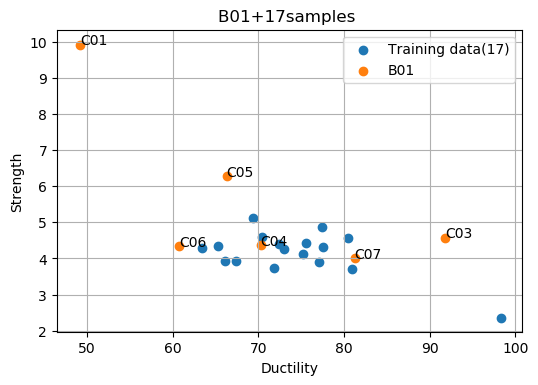

In [6]:
#C01 = [50 ,50]
plt.figure(dpi = 100)
plt.scatter(df['Ductility'] , df['Strength'], label = 'Training data(17)')
plt.scatter(B01[:,6] ,B01[:,5] , label = 'B01')

plt.annotate('C01' ,(C01[6] ,C01[5]))
plt.annotate('C03' ,(C03[6] ,C03[5]))
plt.annotate('C04' ,(C04[6] ,C04[5]))
plt.annotate('C05' ,(C05[6] ,C05[5]))
plt.annotate('C06' ,(C06[6] ,C06[5]))
plt.annotate('C07' ,(C07[6] ,C07[5]))
plt.title('B01+17samples ')
plt.xlabel('Ductility')
plt.ylabel('Strength')
plt.legend(loc = 'best')
plt.grid()
plt.savefig('B01+17samples')

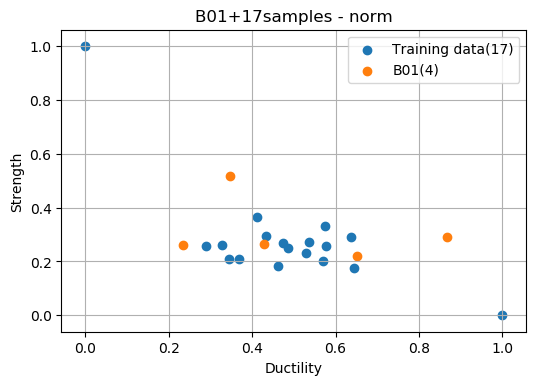

In [7]:
def Normalization(data):
    Min = min(data)
    Max = max(data)
    return (data - Min ) /(Max - Min)
        
def inverse_Normalization(data ,row_data):
    Min = min(row_data)
    Max = max(row_data)

    return data *(Max - Min)+Min

Ductility_added = np.append(df['Ductility'].values ,B01[:,6])
Strength_added = np.append(df['Strength'].values ,B01[:,5])

Ductility_added_norm = Normalization(Ductility_added)
Strength_added_norm = Normalization(Strength_added)


#C01 = [50 ,50]
plt.figure(dpi = 100)
plt.scatter(Ductility_added_norm[:-5] , Strength_added_norm[:-5], label = 'Training data(17)')
plt.scatter(Ductility_added_norm[-5:] , Strength_added_norm[-5:], label = 'B01(4)')

plt.title('B01+17samples - norm')
plt.xlabel('Ductility')
plt.ylabel('Strength')
plt.legend(loc = 'best')
plt.grid()
plt.savefig('B01+17samples -norm')